In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from google.colab import drive
import io
import pandas as pd
import seaborn as sns
import math

In [2]:
data=files.upload()

Saving Pneumococcus_2009-Present_DSH_Casebase_Data.csv to Pneumococcus_2009-Present_DSH_Casebase_Data.csv


In [3]:
df=pd.read_csv(io.StringIO(data['Pneumococcus_2009-Present_DSH_Casebase_Data.csv'].decode('utf-8')))

In [4]:
df.drop(df[df['serotype'] == 'ND'].index, inplace = True)
df.drop(df[df['serotype'] == 'NoPCV13'].index, inplace = True)
df.drop(df[df['serotype'] == 'QNS'].index, inplace = True)
df.drop(df[df['serotype'] == 'NTD'].index, inplace = True)
df.drop(df[df['serotype'] == 'NON TYPABLE'].index, inplace = True)

In [5]:
df.drop(df[df['year'] == 2022].index, inplace = True)

In [6]:
df

,UniqueID,year,month,AdmDate,Age (month),Case Definition,Zila,Address,Outcome,Discharge Date,Hospital Duration,organism,serotype
0,1100136100,2009,Jul,21-Jul-09,21,Very sever disease,NaN,DHAKA,Discharge,27-Jul-09,6,Streptococcus pneumoniae,1
4,1100703100,2009,Sep,12-Sep-09,3,Meningitis,NaN,"RUHITPUR,KERANIGANJ",DORB,26-Sep-09,14,Streptococcus pneumoniae,2
6,1500006300,2009,Oct,2-Oct-09,69,Meningitis,NaN,"JATRABARI,DHAKA",Discharge,11-Oct-09,9,Streptococcus pneumoniae,1
8,1101205100,2009,Nov,8-Nov-09,5,Meningitis,NaN,DHAKA,Discharge,22-Nov-09,14,Streptococcus pneumoniae,12
9,1101299100,2009,Nov,20-Nov-09,6,Meningitis,NaN,NARAYONGANJ,Discharge,6-Dec-09,16,Streptococcus pneumoniae,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,1260002926,2021,Oct,23-Oct-21,72,Not Eligible,MADARIPUR,NaN,Discharge,1-Nov-21,9,Streptococcus pneumoniae,15B
778,1010002925,2021,Oct,24-Oct-21,120,Not Eligible,KURIGRAM,NaN,Died,27-Oct-21,3,Streptococcus pneumoniae,6A
779,1200003587,2021,Dec,7-Dec-21,2,Meningitis,BRAHMANBARIA,NaN,Discharge,19-Dec-21,12,Streptococcus pneumoniae,2
780,1010003159,2021,Dec,9-Dec-21,75,Not Eligible,DHAKA,NaN,Discharge,18-Dec-21,9,Streptococcus pneumoniae,1


In [7]:
plt.rcParams['figure.figsize'] = [40,20]

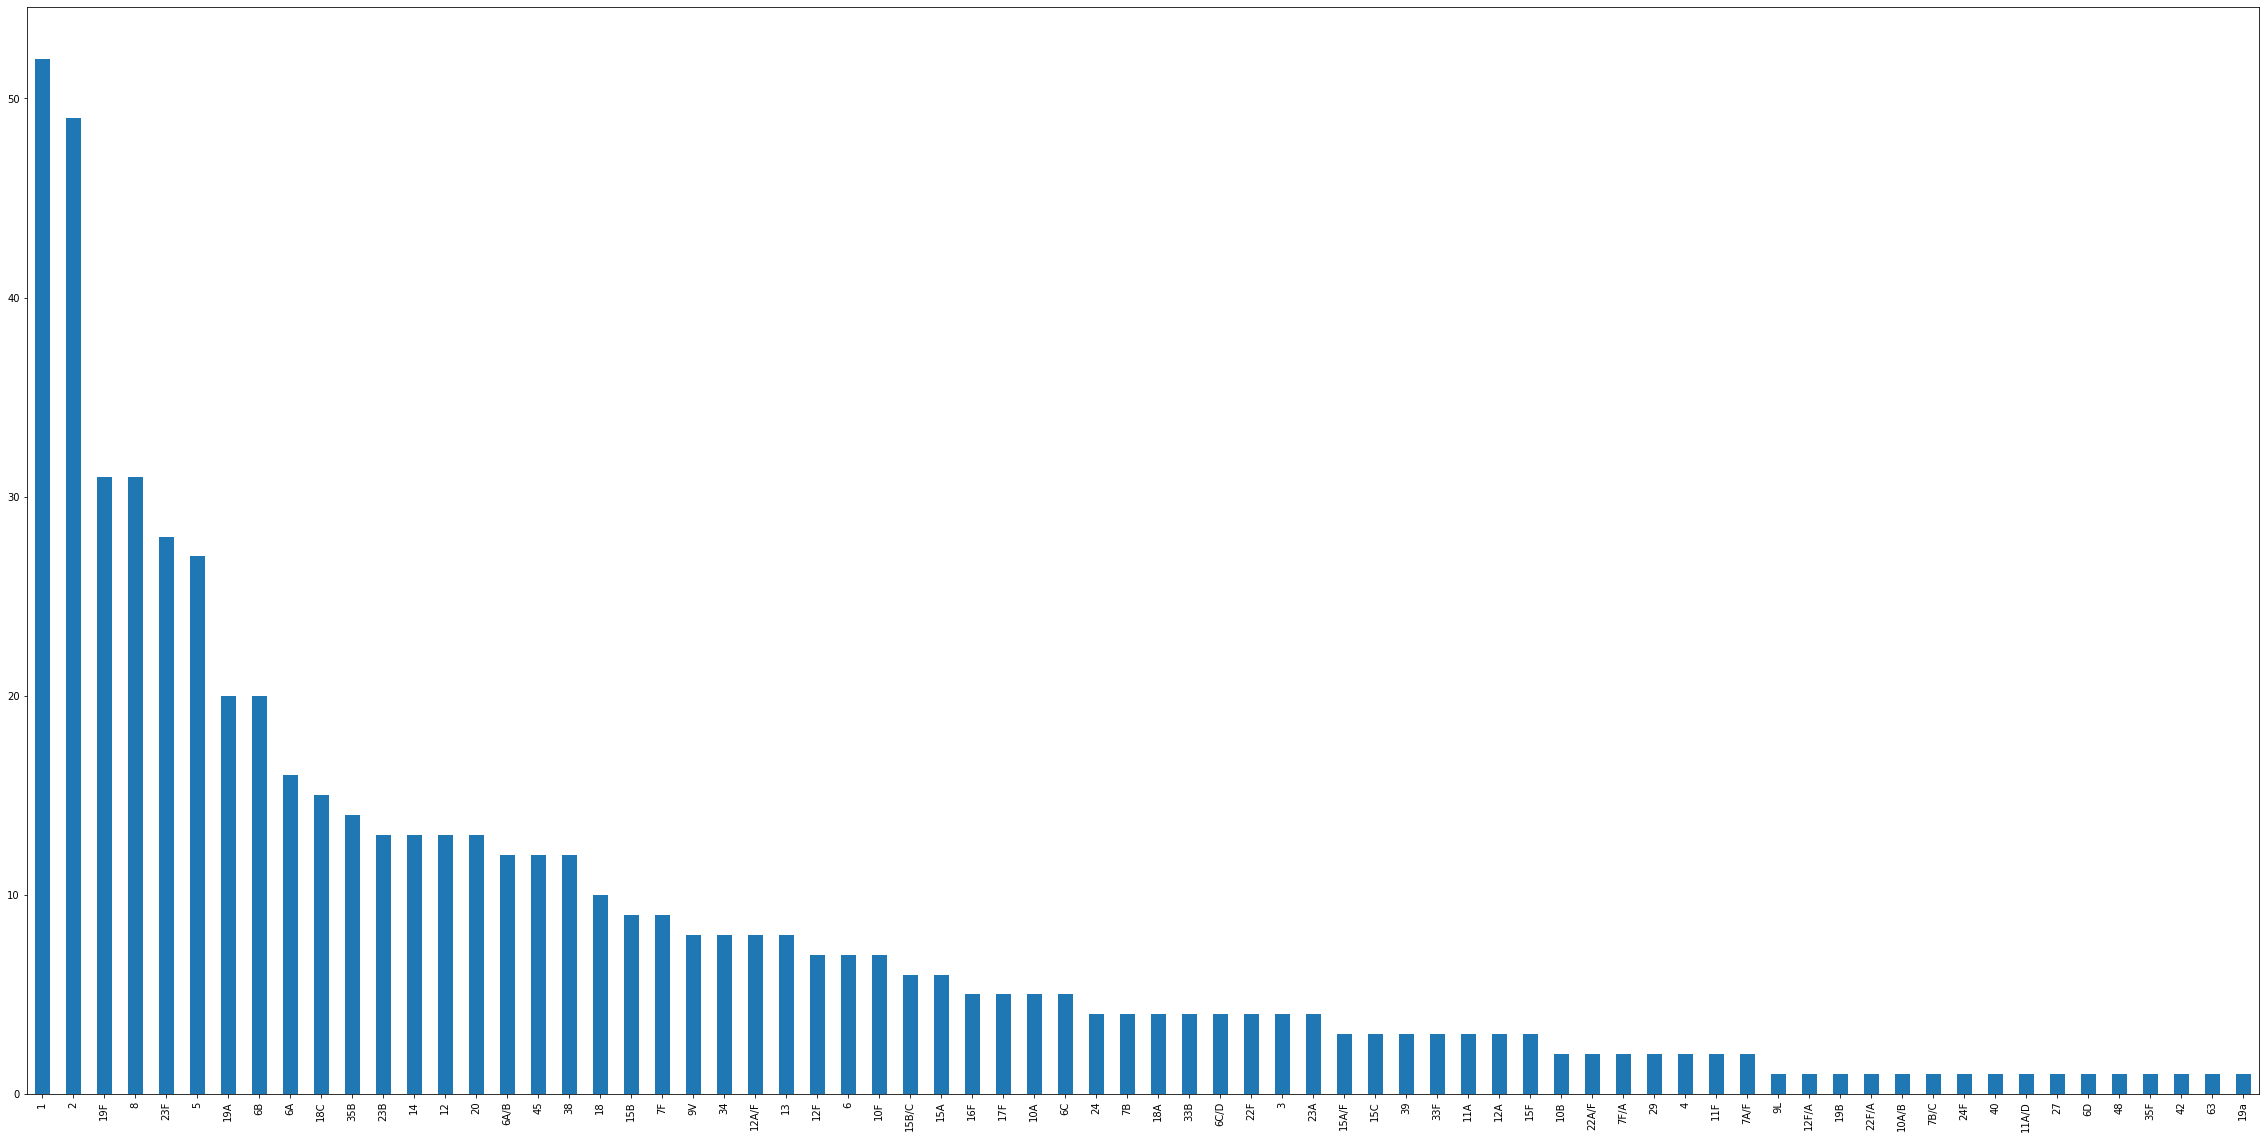

In [8]:
df['serotype'].value_counts().plot(kind='bar')
#plt.title("Serotype Distribution",fontsize=40,color="black")

Calculating sum of top 5 serotypes

In [ ]:
df.drop(columns=['Zila','Address','UniqueID','month','AdmDate','Age (month)','Case Definition','Outcome','Discharge Date','Hospital Duration','organism'],inplace=True)

In [ ]:
df = df.assign(sero_1=df['serotype']=='1')
df.sero_1 = df.sero_1.replace({True: 1, False: 0})

In [ ]:
df = df.assign(sero_2=df['serotype']=='2')
df.sero_2 = df.sero_2.replace({True: 1, False: 0})

In [ ]:
df = df.assign(sero_8=df['serotype']=='8')
df.sero_8 = df.sero_8.replace({True: 1, False: 0})

In [ ]:
df = df.assign(sero_19F=df['serotype']=='19F')
df.sero_19F = df.sero_19F.replace({True: 1, False: 0})

In [ ]:
df = df.assign(sero_23F=df['serotype']=='23F')
df.sero_23F = df.sero_23F.replace({True: 1, False: 0})

In [ ]:
df = df.assign(other=(df['serotype']=='1') | (df['serotype']=='2')| (df['serotype']=='8') | (df['serotype']=='19F')| (df['serotype']=='23F'))

In [ ]:
df

,year,serotype,others,sero_1,sero_2,sero_8,sero_19F,sero_23F
0,2009,1,8,1,0,0,0,0
4,2009,2,8,0,1,0,0,0
6,2009,1,8,1,0,0,0,0
8,2009,12,8,0,0,0,0,0
9,2009,14,8,0,0,0,0,0
...,...,...,...,...,...,...,...,...
784,2022,5,6,0,0,0,0,0
785,2022,1,6,1,0,0,0,0
786,2022,1,6,1,0,0,0,0
787,2022,1,6,1,0,0,0,0


In [ ]:
by_comp = df.groupby("year")
df1=by_comp.count()
df1.reset_index()

,year,serotype,others,sero_1,sero_2,sero_8,sero_19F,sero_23F
0,2009,8,8,8,8,8,8,8
1,2010,40,40,40,40,40,40,40
2,2011,62,62,62,62,62,62,62
3,2012,37,37,37,37,37,37,37
4,2013,53,53,53,53,53,53,53
5,2014,61,61,61,61,61,61,61
6,2015,76,76,76,76,76,76,76
7,2016,49,49,49,49,49,49,49
8,2017,53,53,53,53,53,53,53
9,2018,43,43,43,43,43,43,43


In [ ]:
df3=pd.concat([df1['others']],axis=1)
df3.reset_index()

,year,others
0,2009,8
1,2010,40
2,2011,62
3,2012,37
4,2013,53
5,2014,61
6,2015,76
7,2016,49
8,2017,53
9,2018,43


Evaluating the sum of Top 5 serotypes

In [ ]:
by_comp = df.groupby("year")
df1=by_comp.sum()
df1.reset_index()

In [ ]:
col_list= list(df1.reset_index())
col_list.remove('year')
df1['Sum_top_5'] = df1[col_list].sum(axis=1)
df1.reset_index()

,year,sero_1,sero_2,sero_8,sero_19F,sero_23F,Sum_top_5
0,2009,3,1,0,0,1,5
1,2010,4,4,4,1,1,14
2,2011,2,14,1,4,6,27
3,2012,5,3,2,1,1,12
4,2013,3,0,3,7,2,15
5,2014,3,1,4,3,3,14
6,2015,4,4,2,10,4,24
7,2016,2,2,1,2,1,8
8,2017,6,9,2,1,5,23
9,2018,7,3,6,1,2,19


downloading df1

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
te=pd.DataFrame(df1.reset_index())
te.to_excel("top_5.xlsx")

downloading only sum of top 5 for each year

In [ ]:
df1.drop(columns=['sero_1','sero_2','sero_8','sero_19F','sero_23F'],inplace=True)

In [ ]:
df1

,Sum_top_5
year,
2009,5
2010,14
2011,27
2012,12
2013,15
2014,14
2015,24
2016,8
2017,23


In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
te=pd.DataFrame(df1.reset_index())
te.to_excel("Sum_top_5.xlsx")